In [ ]:
#Social_Network_Ads.csv

**Import libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

**Importing the dataset**

In [3]:
df = pd.read_csv("Social_Network_Ads.csv")
print(df.shape)
df.head()

(400, 5)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [7]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

Age                0
EstimatedSalary    0
Gender             0
Purchased          0
User ID            0
dtype: int64

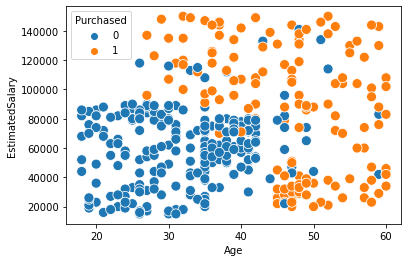

In [8]:
sns.scatterplot(data=df,x="Age",y="EstimatedSalary",hue="Purchased",s=100)
plt.show()

- Users aged 40 and above have a higher tendency to purchase a SUV car
- Also users earning an estimated salary greater than 90000 prefer to purchase a SUV car

<AxesSubplot:>

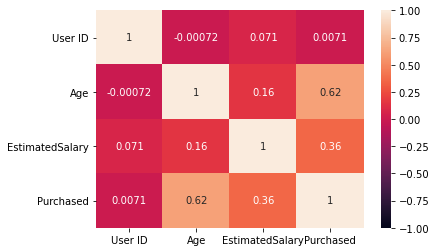

In [9]:
sns.heatmap(df.corr(),annot = True,vmin=-1)

- Age has a very good correlation of 0.62 with Purchased. Therefore it is an important feature

**Splitting the dataset into the Training set and Test set**

In [10]:
X = df[["Age","EstimatedSalary"]].values
y = df["Purchased"].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=20)

X_train.shape,X_test.shape

((280, 2), (120, 2))

**Feature Scaling**

In [11]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train) 

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Fitting SVM to the Training set**

In [12]:
from sklearn.svm import SVC
model= SVC(kernel='rbf', gamma='scale')
model.fit(X_train_scaled, y_train)

SVC()

**Predicting the Test set results**

In [13]:
y_pred = model.predict(X_test_scaled)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1], dtype=int64)

In [14]:
df_pred = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df_pred

,Actual,Predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
115,0,0
116,1,1
117,0,0
118,1,1


**Making the Confusion Matrix**

In [15]:
from sklearn.metrics import confusion_matrix,plot_roc_curve,ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_pred)
cm

array([[66,  4],
       [ 5, 45]], dtype=int64)

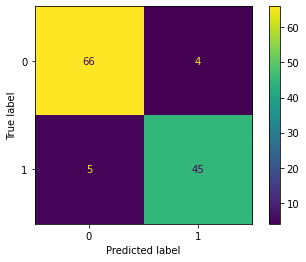

In [16]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
cm_display.plot()
plt.show()

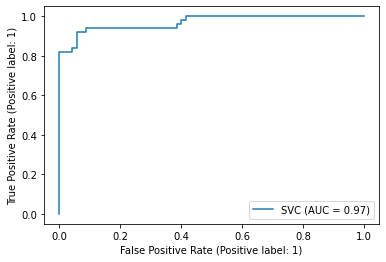

In [18]:
plot_roc_curve(model,X_test_scaled,y_test)

- AUC score is 0.98 which indicates that it is a verg good classifier